In [2]:
import os
import json
import torch
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

NVIDIA A100 80GB PCIe


In [4]:
for root, dirs, files in os.walk('/home/serfani/serfani_data0/E33OMA'):
    
    sorted_files = sorted(files)
    list1 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'aijlh1E33oma_ai']   # Velocity Fields (time, level, lat, lon)
    list2 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'cijh1E33oma_ai']    # Precipitation (time, lat, lon)
    list3 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'taijh1E33oma_ai']   # Sea Salt Src (time, lat, lon)
    list4 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'tNDaijh1E33oma_ai'] # Clay-BCB Src (time, lat, lon)
    list5 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'taijlh1E33oma_ai']  # Aerosols Mixing Ratio (time, level, lat, lon)


### Calculation of descriptive statistics of input/output variables

In [3]:
data1 = list()
ds1  = xr.open_mfdataset(list1[:365]).isel(level=0)
data1.append([ds1['u'].mean().values.item(), ds1['u'].std().values.item(), ds1['u'].min().values.item(), ds1['u'].max().values.item()])
data1.append([ds1['v'].mean().values.item(), ds1['v'].std().values.item(), ds1['v'].min().values.item(), ds1['v'].max().values.item()])
data1.append([ds1['omega'].mean().values.item(), ds1['omega'].std().values.item(), ds1['omega'].min().values.item(), ds1['omega'].max().values.item()])

ds2  = xr.open_mfdataset(list2[:365])
data1.append([ds2['prec'].mean().values.item(), ds2['prec'].std().values.item(), ds2['prec'].min().values.item(), ds2['prec'].max().values.item()])

ds3  = xr.open_mfdataset(list3[:365])
data1.append([ds3['seasalt1_ocean_src'].mean().values.item(), ds3['seasalt1_ocean_src'].std().values.item(), ds3['seasalt1_ocean_src'].min().values.item(), ds3['seasalt1_ocean_src'].max().values.item()])

ds4  = xr.open_mfdataset(list4[:365])
data1.append([ds4['Clay_emission'].mean().values.item(), ds4['Clay_emission'].std().values.item(), ds4['Clay_emission'].min().values.item(), ds4['Clay_emission'].max().values.item()])
data1.append([ds4['BCB_biomass_src'].mean().values.item(), ds4['BCB_biomass_src'].std().values.item(), ds4['BCB_biomass_src'].min().values.item(), ds4['BCB_biomass_src'].max().values.item()])

ds5  = xr.open_mfdataset(list5[:365]).isel(level=0)
data1.append([ds5['seasalt1'].mean().values.item(), ds5['seasalt1'].std().values.item(), ds5['seasalt1'].min().values.item(), ds5['seasalt1'].max().values.item()])
data1.append([ds5['Clay'].mean().values.item(), ds5['Clay'].std().values.item(), ds5['Clay'].min().values.item(), ds5['Clay'].max().values.item()])
data1.append([ds5['BCB'].mean().values.item(), ds5['BCB'].std().values.item(), ds5['BCB'].min().values.item(), ds5['BCB'].max().values.item()])


In [4]:
data2 = list()
ds1  = xr.open_mfdataset(list1[:365]).isel(level=0)
u = np.array(np.ma.log10(ds1['u'].values))
data2.append([u.mean(), u.std(), u.min(), u.max()])

v = np.array(np.ma.log10(ds1['v'].values))
data2.append([v.mean(), v.std(), v.min(), v.max()])

w = np.array(np.ma.log10(ds1['omega'].values))
data2.append([w.mean(), w.std(), w.min(), w.max()])


ds2  = xr.open_mfdataset(list2[:365])
p = np.array(np.ma.log10(ds2['prec'].values))
data2.append([p.mean(), p.std(), p.min(), p.max()])


ds3  = xr.open_mfdataset(list3[:365])
ss_src = np.array(np.ma.log10(ds3['seasalt1_ocean_src'].values))
data2.append([ss_src.mean(), ss_src.std(), ss_src.min(), ss_src.max()])


ds4  = xr.open_mfdataset(list4[:365])
c_src = np.array(np.ma.log10(ds4['Clay_emission'].values))
data2.append([c_src.mean(), c_src.std(), c_src.min(), c_src.max()])

bc_src = np.array(np.ma.log10(ds4['BCB_biomass_src'].values))
data2.append([bc_src.mean(), bc_src.std(), bc_src.min(), bc_src.max()])


ds5  = xr.open_mfdataset(list5[:365]).isel(level=0)
ss_conc = np.array(np.ma.log10(ds5['seasalt1'].values))
data2.append([ss_conc.mean(), ss_conc.std(), ss_conc.min(), ss_conc.max()])

c_conc= np.array(np.ma.log10(ds5['Clay'].values))
data2.append([c_conc.mean(), c_conc.std(), c_conc.min(), c_conc.max()])

bc_conc = np.array(np.ma.log10(ds5['BCB'].values))
data2.append([bc_conc.mean(), bc_conc.std(), bc_conc.min(), bc_conc.max()])

In [10]:
import json

data = [data1, data2]

variables = ['u', 'v', 'w', 'prec', 'ss_src', 'c_src', 'bc_src', 'ss_conc', 'c_conc', 'bc_conc']

result = {'set1': {}, 'set2': {}}

for idx1, key in enumerate(result.keys()):
    for idx2, variable in enumerate(variables):
        mean, std, min_val, max_val = data[idx1][idx2]
        result[key][variable] = {
            'mean': float(mean),
            'std':  float(std),
            'min':  float(min_val),
            'max':  float(max_val)
        }

with open('variable_statistics.json', 'a') as jf:
    json.dump(result, jf, indent=4)


In [5]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Converting a CFTimeIndex with dates from a non-standard calendar")
    for root, dirs, files in os.walk('/home/serfani/serfani_data0/E33OMA'):
        
        sorted_files = sorted(files)
        list1 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'aijlh1E33oma_ai']   # Velocity Fields (time, level, lat, lon)

    datetimeindex = xr.open_mfdataset(list1[:365]).indexes['time'].to_datetimeindex()

### Plot global average of conc. on pressure levels 

In [23]:
ds1 = xr.open_mfdataset(list1)
ds5 = xr.open_mfdataset(list5)

weights = np.cos(np.deg2rad(ds1.lat))
weights.name = "weights"

ds1_avg = ds1.weighted(weights).mean(dim=("lat", "lon"))
ds5_avg = ds5.weighted(weights).mean(dim=("lat", "lon"))

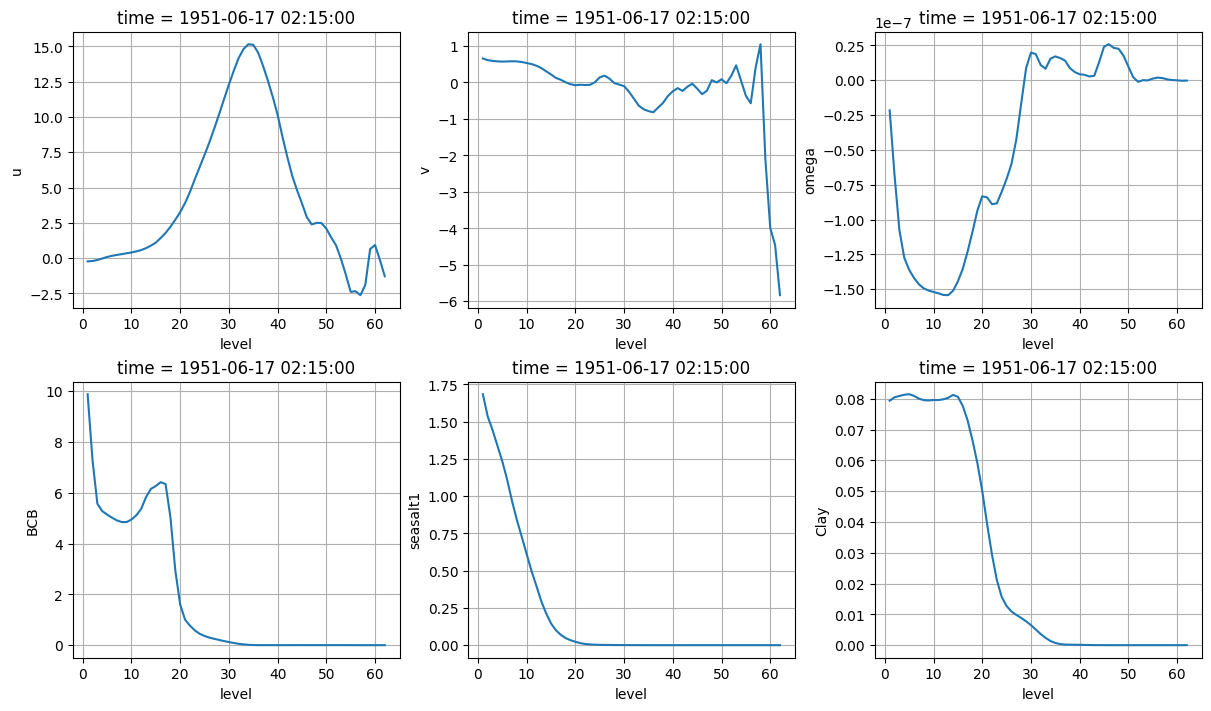

In [26]:
t = 25440 + 100
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 7), constrained_layout=True)

ds1_avg['u'].isel(time=t).plot(ax=axs[0, 0])
axs[0, 0].grid()

ds1_avg['v'].isel(time=t).plot(ax=axs[0, 1])
axs[0, 1].grid()

ds1_avg['omega'].isel(time=t).plot(ax=axs[0, 2])
axs[0, 2].grid()

ds5_avg['BCB'].isel(time=t).plot(ax=axs[1, 0])
axs[1, 0].grid()

ds5_avg['seasalt1'].isel(time=t).plot(ax=axs[1, 1])
axs[1, 1].grid()

ds5_avg['Clay'].isel(time=t).plot(ax=axs[1, 2])
axs[1, 2].grid()

plt.show()

### Dataset

In [12]:
from torch.utils.data import Dataset
import torchvision.transforms as T
import warnings


class E33OMA(Dataset):

    def __init__(self, period, species, padding, root='/home/serfani/serfani_data0/E33OMA'):
        super(E33OMA, self).__init__()
        
        self.period  = period
        self.species = species
        self.padding = padding
        self.root    = root
        
        self._get_data_index()
    
    def _get_data_index(self):
        
        for root, dirs, files in os.walk(self.root):
            
            sorted_files = sorted(files)
            list1 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'aijlh1E33oma_ai']   # Velocity Fields (time, level, lat, lon)
            # list2 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'cijh1E33oma_ai']    # Precipitation (time, lat, lon)
            # list3 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'taijh1E33oma_ai']   # Sea Salt Src (time, lat, lon)
            # list3 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'tNDaijh1E33oma_ai'] # Clay-BCB Src (time, lat, lon)
            # list5 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'taijlh1E33oma_ai']  # Aerosols Mixing Ratio (time, level, lat, lon)

        # Convert `cftime.DatetimeNoLeap` to `pandas.to_datetime()`
        warnings.filterwarnings("ignore", message="Converting a CFTimeIndex with dates from a non-standard calendar")
        datetimeindex = xr.open_mfdataset(list1[:365]).indexes['time'].to_datetimeindex()

        idx = np.arange(len(datetimeindex))
        rng = np.random.default_rng(0)
        rng.shuffle(idx)
        
        if   self.period == 'train':
            self.datetimeindex = datetimeindex[idx[:12264]] # 70%
        
        elif self.period == 'val':
            self.datetimeindex = datetimeindex[idx[12264:]] # 30%
        
        elif self.period == 'test':
            self.datetimeindex = xr.open_mfdataset(list1[365:]).indexes['time'].to_datetimeindex()

    def __getitem__(self, index):
        
        timestep = self.datetimeindex[index].strftime('%Y%m%d')
        
        ds1 = xr.open_dataset(os.path.join(self.root, f'{timestep}.aijlh1E33oma_ai.nc'))
        ds1['time'] = ds1.indexes['time'].to_datetimeindex()
        
        ds2 = xr.open_dataset(os.path.join(self.root, f'{timestep}.cijh1E33oma_ai.nc'))
        ds2['time'] = ds2.indexes['time'].to_datetimeindex()

        X1 = np.expand_dims(ds1['u'].isel(level=0).sel(time=self.datetimeindex[index]), axis=0)
        X2 = np.expand_dims(ds1['v'].isel(level=0).sel(time=self.datetimeindex[index]), axis=0)
        X3 = np.expand_dims(ds1['omega'].isel(level=0).sel(time=self.datetimeindex[index]), axis=0)

        X4 = np.expand_dims(ds2['prec'].sel(time=self.datetimeindex[index]), axis=0)

        with open('variable_statistics.json', 'r') as jf:
            vs = json.load(jf)
        
        X1_mean = vs['u']['mean'];    X1_std = vs['u']['std']
        X2_mean = vs['v']['mean'];    X2_std = vs['v']['std']
        X3_mean = vs['w']['mean'];    X3_std = vs['w']['std']
        X4_mean = vs['prec']['mean']; X4_std = vs['prec']['std']

        if self.species == 'seasalt':
            # Add positive lag for target variable
            ds3 = xr.open_dataset(os.path.join(self.root, f'{timestep}.taijh1E33oma_ai.nc'))
            ds3['time'] = ds3.indexes['time'].to_datetimeindex()

            ds4 = xr.open_dataset(os.path.join(self.root, f'{timestep}.taijlh1E33oma_ai.nc'))
            ds4['time'] = ds4.indexes['time'].to_datetimeindex()

            X5 = np.expand_dims(ds3['seasalt1_ocean_src'].sel(time=self.datetimeindex[index]), axis=0)
            y  = np.expand_dims(ds4['seasalt1'].isel(level=0).sel(time=self.datetimeindex[index]), axis=0)

            X5_mean = vs['ss_src']['mean']; X5_std = vs['ss_src']['std']
            y_mean  = vs['ss_conc']['mean']; y_std = vs['ss_conc']['std']

        if self.species == 'clay':
            # Add positive lag for target variable
            ds3 = xr.open_dataset(os.path.join(self.root, f'{timestep}.tNDaijh1E33oma_ai.nc'))
            ds3['time'] = ds3.indexes['time'].to_datetimeindex()

            ds4 = xr.open_dataset(os.path.join(self.root, f'{timestep}.taijlh1E33oma_ai.nc'))
            ds4['time'] = ds4.indexes['time'].to_datetimeindex()

            X5 = np.expand_dims(ds3['Clay_emission'].sel(time=self.datetimeindex[index]), axis=0)
            y  = np.expand_dims(ds4['Clay'].isel(level=0).sel(time=self.datetimeindex[index]), axis=0)

            X5_mean = vs['c_src']['mean']; X5_std = vs['c_src']['std']
            y_mean  = vs['c_conc']['mean']; y_std = vs['c_conc']['std']

        if self.species == 'bcb':
            # Add positive lag for target variable
            ds3 = xr.open_dataset(os.path.join(self.root, f'{timestep}.tNDaijh1E33oma_ai.nc'))
            ds3['time'] = ds3.indexes['time'].to_datetimeindex()

            ds4 = xr.open_dataset(os.path.join(self.root, f'{timestep}.taijlh1E33oma_ai.nc'))
            ds4['time'] = ds4.indexes['time'].to_datetimeindex()

            X5 = np.expand_dims(ds3['BCB_biomass_src'].sel(time=self.datetimeindex[index]), axis=0)
            y  = np.expand_dims(ds4['BCB'].isel(level=0).sel(time=self.datetimeindex[index]), axis=0)

            X5_mean = vs['bc_src']['mean']; X5_std = vs['bc_src']['std']
            y_mean  = vs['bc_conc']['mean']; y_std = vs['bc_conc']['std']


        X = np.concatenate((X1, X2, X3, X4, X5), axis=0)  # (5, 90, 144)

        Xs_mean = np.array((X1_mean, X2_mean, X3_mean, X4_mean, X5_mean), dtype=np.float32).reshape(-1, 1, 1)
        Xs_std  = np.array((X1_std, X2_std, X3_std, X4_std, X5_std), dtype=np.float32).reshape(-1, 1, 1)
 
        self.y_mean = np.array(y_mean, dtype=np.float32).reshape(-1, 1, 1)
        self.y_std  = np.array(y_std, dtype=np.float32).reshape(-1, 1, 1)

        X = (X - Xs_mean) / Xs_std
        y = (y -  self.y_mean) / self.y_std

        if self.padding:
            w = X.shape[2] # width
            h = X.shape[1] # height
            
            top_pad   = self.padding - h
            right_pad = self.padding - w
            
            X = np.lib.pad(X, ((0, 0), (top_pad, 0), (0, right_pad)), mode='constant', constant_values=0)
        
        X = torch.from_numpy(X).type(torch.float32) # torch image: C x H x W
        y = torch.from_numpy(y).type(torch.float32) # torch image: C x H x W

        return X, y
        
    def __len__(self):
        return len(self.datetimeindex)

### Add a new padding strategy 

In [7]:
import numpy as np

def cyclic_padding(data, padding):
    
    W = data.shape[2] # longitude
    
    # Define the amount of padding required
    pad_left = (padding - W) // 2  # Padding on the left side
    pad_right = padding - W - pad_left  # Padding on the right side

    if (pad_left <= W) and (pad_right <= W):
        
        # Cyclically extend data along the longitude
        return np.concatenate([data[..., -pad_left:], data, data[..., :pad_right]], axis=2)
    
    raise AttributeError(f"The requested padding size is larger than width size of the input image.")

def reflective_padding(data, padding):

    H = data.shape[1] # latitude

    # Define the amount of padding required
    pad_top = (padding - H) // 2  # Padding on the top
    pad_bottom = padding - H - pad_top  # Padding on the bottom

    pad_top += 1
    pad_bottom += 1

    if (pad_top <= H) and (pad_bottom <= H):
        
        # Reflect data at the latitude boundaries
        return np.concatenate((np.fliplr(data[:, 1:pad_top]), data, np.fliplr(data[:, -pad_bottom:-1])), axis=1)
    
    raise AttributeError(f"The requested padding size is larger than height size of the input image.")

def padding_data(data, padding):
    data = cyclic_padding(data, padding)
    data = reflective_padding(data, padding)

    return data
    

In [8]:
data = np.arange(25).reshape(1, 5, 5)
print(data)

print(padding_data(data, 13))
padding_data(data, 13).shape

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]
  [15 16 17 18 19]
  [20 21 22 23 24]]]
[[[21 22 23 24 20 21 22 23 24 20 21 22 23]
  [16 17 18 19 15 16 17 18 19 15 16 17 18]
  [11 12 13 14 10 11 12 13 14 10 11 12 13]
  [ 6  7  8  9  5  6  7  8  9  5  6  7  8]
  [ 1  2  3  4  0  1  2  3  4  0  1  2  3]
  [ 6  7  8  9  5  6  7  8  9  5  6  7  8]
  [11 12 13 14 10 11 12 13 14 10 11 12 13]
  [16 17 18 19 15 16 17 18 19 15 16 17 18]
  [21 22 23 24 20 21 22 23 24 20 21 22 23]
  [16 17 18 19 15 16 17 18 19 15 16 17 18]
  [11 12 13 14 10 11 12 13 14 10 11 12 13]
  [ 6  7  8  9  5  6  7  8  9  5  6  7  8]
  [ 1  2  3  4  0  1  2  3  4  0  1  2  3]]]


(1, 13, 13)

In [13]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Converting a CFTimeIndex with dates from a non-standard calendar")
    
    dataset = E33OMA(period='test', species='bcb', padding=256)

    print(len(dataset))
    dataiter = iter(dataset)
    X, y = next(dataiter)
    print(X.shape, y.shape)

17520
torch.Size([5, 256, 256]) torch.Size([1, 90, 144])


In [1]:
import os
import json
import warnings
import os.path as osp

import numpy as np
import xarray as xr

import torch
from torch.utils.data import Dataset

class E33OMAPAD(Dataset):

    def __init__(self, period, species, padding):
        super(E33OMAPAD, self).__init__()
        
        self.period  = period
        self.species = species
        self.padding = padding

    def _cyclic_padding(self, data):
    
        W = data.shape[3] # longitude

        # Define the amount of padding required
        pad_left = (self.padding[1] - W) // 2  # Padding on the left side
        pad_right = self.padding[1] - W - pad_left  # Padding on the right side

        if (pad_left <= W) and (pad_right <= W):
            
            # Cyclically extend data along the longitude
            return np.concatenate([data[..., -pad_left:], data, data[..., :pad_right]], axis=3)
        
        raise AttributeError(f"The requested padding size is larger than width size of the input image.")

    def _reflective_padding(self, data):

        H = data.shape[2] # latitude
        
        # Define the amount of padding required
        pad_top = (self.padding[0] - H) // 2  # Padding on the top
        pad_bottom = self.padding[0] - H - pad_top  # Padding on the bottom

        pad_top    += 1
        pad_bottom += 1

        if (pad_top <= H) and (pad_bottom <= H):
            
            # Reflect data at the latitude boundaries
            return np.concatenate((np.fliplr(data[:, :, 1:pad_top]), data, np.fliplr(data[:, :, -pad_bottom:-1])), axis=2)
        
        raise AttributeError(f"The requested padding size is larger than height size of the input image.")

    def _padding_data(self, data):
        data = self._cyclic_padding(data)
        data = self._reflective_padding(data)
        return data


In [4]:
class E33OMACRNN(E33OMAPAD):
    
    def __init__(self, period, species, padding, sequence_length=10, root='/home/serfani/serfani_data0/E33OMA-90Days.nc'):
        super(E33OMACRNN, self).__init__(period, species, padding)
        self.seq_len = sequence_length
        self.root    = root
    
        self._get_data()
    
    def _get_data(self):
        
        ds = xr.open_dataset(self.root)

        self.lat = ds.indexes['lat']
        self.lon = ds.indexes['lon']
        
        # Add negative lag for input features
        X1 = ds['u'].isel(level=0).values
        X2 = ds['v'].isel(level=0).values
        X3 = ds['omega'].isel(level=0).values
        X4 = ds['prec'].values

        if self.species == 'seasalt':
            # Add positive lag for target variable
            y  = ds['seasalt_conc'].isel(level=0).values
            X5 = ds['seasalt_src'].values
        
        if self.species == 'clay':
            y  = ds['clay_conc'].isel(level=0).values
            X5 = ds['clay_src'].values
            
        if self.species == 'bcb':
            y  = ds['bcb_conc'].isel(level=0).values
            X5 = ds['bcb_src'].values
        
        Xs = np.stack([X1, X2, X3, X4, X5], axis=1) # (4320, 5, 90, 144)
                
        self.y_mean = y[:3023, ...].mean().reshape(-1, 1, 1)
        self.y_std  = y[:3023, ...].std().reshape(-1, 1, 1)
        
        self.X_mean = Xs[:3023, ...].mean(axis=(0, 2, 3)).reshape(-1, 1, 1) 
        self.X_std  = Xs[:3023, ...].std(axis=(0, 2, 3)).reshape(-1, 1, 1)

        Xs = (Xs - self.X_mean) / self.X_std
        y  = (y  - self.y_mean) / self.y_std

        X = self.create_sequences(Xs) # (seq_len, 5, 90 + (2xpadding), 144 + (2xpadding))
        y = y[self.seq_len - 1:]

        if self.period == "train": # 70% of the total data
            self.y = y[:3023, ...]
            self.X = X[:3023, ...]
            
        elif self.period == "val": # 10% of the total data
            self.y = y[3023:3455, ...]
            self.X = X[3023:3455, ...]
            
        elif self.period == "test": # 20% of the total data
            self.y = y[3455:, ...]
            self.X = X[3455:, ...]
            self.datetimeindex = ds.indexes['time'][3455 + self.seq_len - 1:] # Add positive lag for target variable
        
    def create_sequences(self, data_array):
        # Use sliding_window_view to create sequences
        return np.lib.stride_tricks.sliding_window_view(data_array, (self.seq_len, *data_array.shape[1:])).squeeze()

    def __getitem__(self, index):
        
        X = np.array(self.X[index, ...], copy=True)
        y = np.array(self.y[index, ...], copy=True)

        if self.padding:
            X = self._padding_data(X) # (seq_len, 5, 90 + (2xpadding), 144 + (2xpadding))

        X = torch.from_numpy(X).type(torch.float32) # torch image: (sequence_length, channels, height, width)
        y = torch.from_numpy(y).type(torch.float32) # torch image: (sequence_length, channels, height, width)

        return X, y
           
    def __len__(self):
        return len(self.y)

In [5]:
dataset = E33OMACRNN(period='test', species='bcb', padding=(100, 154), sequence_length=10)

dataiter = iter(dataset)

X, y = next(dataiter)

print(len(dataset))
print(X.shape, y.shape)
print(dataset.datetimeindex)

856
torch.Size([10, 5, 100, 154]) torch.Size([90, 144])
DatetimeIndex(['1950-03-14 04:15:00', '1950-03-14 04:45:00',
               '1950-03-14 05:15:00', '1950-03-14 05:45:00',
               '1950-03-14 06:15:00', '1950-03-14 06:45:00',
               '1950-03-14 07:15:00', '1950-03-14 07:45:00',
               '1950-03-14 08:15:00', '1950-03-14 08:45:00',
               ...
               '1950-03-31 19:15:00', '1950-03-31 19:45:00',
               '1950-03-31 20:15:00', '1950-03-31 20:45:00',
               '1950-03-31 21:15:00', '1950-03-31 21:45:00',
               '1950-03-31 22:15:00', '1950-03-31 22:45:00',
               '1950-03-31 23:15:00', '1950-03-31 23:45:00'],
              dtype='datetime64[ns]', name='time', length=856, freq=None)


In [16]:
from model import ConvLSTM
model = ConvLSTM(5, 10, 3, 2)

model(X.unsqueeze(0))[:, :, 5:90+5, 5:144+5].shape

torch.Size([1, 1, 90, 144])